<a href="https://colab.research.google.com/github/webmasterKY/web1/blob/main/nasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [147]:
df = pd.read_csv("neo.csv")

카글 NASA - Nearest Earth Objects <br>
https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects

There is an infinite number of objects in the outer space. Some of them are closer than we think. Even though we might think that a distance of 70,000 Km can not potentially harm us, but at an astronomical scale, this is a very small distance and can disrupt many natural phenomena. These objects/asteroids can thus prove to be harmful. Hence, it is wise to know what is surrounding us and what can harm us amongst those. Thus, this dataset compiles the list of NASA certified asteroids that are classified as the nearest earth object.

In [148]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [149]:
df.count()

id                    90836
name                  90836
est_diameter_min      90836
est_diameter_max      90836
relative_velocity     90836
miss_distance         90836
orbiting_body         90836
sentry_object         90836
absolute_magnitude    90836
hazardous             90836
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


column 설명 <br>
id : 식별자 <br>
name : nasa가 부여한 소행성 이름 <br>
est_diameter_min : 최소 추정 직경 <br>
est_diameter_max : 최대 추정 직경 <br>
relative_velocity : 지구 대비 상대적 속도 <br>
miss_distance : 지구로부터 거리 <br>
orbiting_body : 소행성이 돌고있는 행성 <br>
sentry_object : Included in sentry - an automated collision monitoring system <br>
absolute_magnitude : 고유광도 <br>
hazardous : Boolean feature that shows whether asteroid is harmful or not




목표 : 어떤 column이 hazardous 를 결정하는지, 의사결정 트리를 통해 찾아보자

In [151]:
df.orbiting_body.unique()

array(['Earth'], dtype=object)

Earth로 통일되어있으므로 제외해도 될듯

In [152]:
len(df.id.unique())

27423

In [153]:
#id도 별로 안중요해보임. drop하자.
#name의 경우도 마찬가지로 라벨로 사용에는 용이하나 그 외에는 어려울듯.

In [154]:
d_df = df.drop(columns = ['id','orbiting_body'],axis = 1)

결정트리를 이용해 분류를 진행하자

In [155]:
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from subprocess import check_call
import matplotlib.image as mpimg
import seaborn as sns

In [156]:
X = d_df.drop(columns = ['name', 'hazardous'], axis = 1)
y = d_df.hazardous
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,train_size=0.66)

In [157]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree = dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

test 검증

In [158]:
print('confusion matrix\n', confusion_matrix(y_test,y_pred))
print("-"*50)
print(f'Accuracy : {accuracy_score(y_test,y_pred)*100}')

confusion matrix
 [[27819    75]
 [ 2602   389]]
--------------------------------------------------
Accuracy : 91.33236198802007


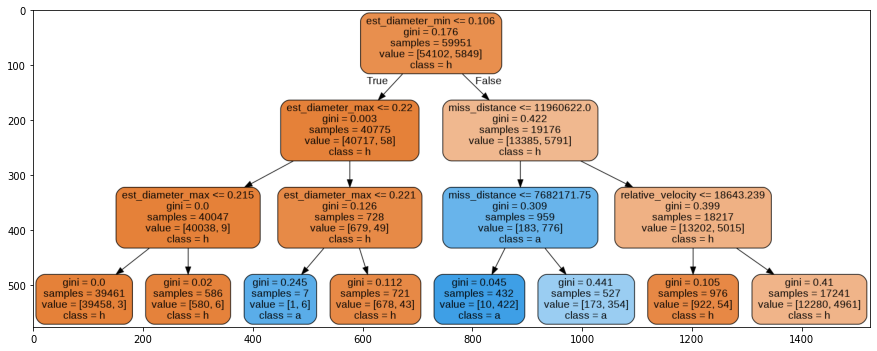

In [159]:
export_graphviz(
    dtree, # 학습한 모형
    out_file = './nasa_tree.dot', # .dot 파일 저장 위치
    feature_names = X.columns, # 사용한 변수 이름
    class_names = 'hazardous', # 예측할 타겟 클래스 이름
    rounded=True, # 사각형 끝을 둥글게
    filled=True # 사각형 안 색깔 채우기
)
# 예측한 모형 png로 바꿔서, 시각화 하기
check_call(['dot','-Tpng','nasa_tree.dot','-o','OutputFile.png'])
img = mpimg.imread('./OutputFile.png')
plt.figure(figsize = (15,10))
plt.imshow(img)


In [160]:
impt=(dtree.feature_importances_)
impt.sort()

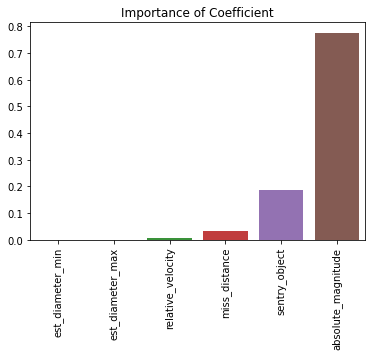

In [161]:
plt.title("Importance of Coefficient")
sns.barplot(x=X.columns, y=impt)
plt.xticks(rotation = 90)
plt.show()

최고의 정확도 찾아내보자

In [162]:
for i in range(1,20):
  dtree = DecisionTreeClassifier(max_depth=i)
  dtree = dtree.fit(X_train,y_train)
  y_pred = dtree.predict(X_test)
  print("max depth : ", i)
  print('confusion matrix\n', confusion_matrix(y_test,y_pred))
  print(f'Accuracy : {accuracy_score(y_test,y_pred)*100}')
  print("-"*50)

max depth :  1
confusion matrix
 [[27894     0]
 [ 2991     0]]
Accuracy : 90.31568722680913
--------------------------------------------------
max depth :  2
confusion matrix
 [[27821    73]
 [ 2605   386]]
Accuracy : 91.3291241703092
--------------------------------------------------
max depth :  3
confusion matrix
 [[27819    75]
 [ 2602   389]]
Accuracy : 91.33236198802007
--------------------------------------------------
max depth :  4
confusion matrix
 [[27829    65]
 [ 2615   376]]
Accuracy : 91.32264853488749
--------------------------------------------------
max depth :  5
confusion matrix
 [[27649   245]
 [ 2487   504]]
Accuracy : 91.15428201392261
--------------------------------------------------
max depth :  6
confusion matrix
 [[27652   242]
 [ 2488   503]]
Accuracy : 91.16075764934433
--------------------------------------------------
max depth :  7
confusion matrix
 [[27655   239]
 [ 2496   495]]
Accuracy : 91.14456856079003
--------------------------------------------

In [163]:
for i in range(1,7):
  dtree = DecisionTreeClassifier(max_features=i)
  dtree = dtree.fit(X_train,y_train)
  y_pred = dtree.predict(X_test)
  print("max features : ", i)
  print('confusion matrix\n', confusion_matrix(y_test,y_pred))
  print(f'Accuracy : {accuracy_score(y_test,y_pred)*100}')
  print("-"*50)


max features :  1
confusion matrix
 [[26403  1491]
 [ 1597  1394]]
Accuracy : 90.00161890885543
--------------------------------------------------
max features :  2
confusion matrix
 [[26294  1600]
 [ 1654  1337]]
Accuracy : 89.4641411688522
--------------------------------------------------
max features :  3
confusion matrix
 [[26290  1604]
 [ 1577  1414]]
Accuracy : 89.70050186174518
--------------------------------------------------
max features :  4
confusion matrix
 [[26248  1646]
 [ 1650  1341]]
Accuracy : 89.32815282499595
--------------------------------------------------
max features :  5
confusion matrix
 [[26235  1659]
 [ 1640  1351]]
Accuracy : 89.31843937186336
--------------------------------------------------
max features :  6
confusion matrix
 [[26271  1623]
 [ 1636  1355]]
Accuracy : 89.44795208029788
--------------------------------------------------


In [164]:
for i in range(2,10):
  dtree = DecisionTreeClassifier(min_samples_split=i)
  dtree = dtree.fit(X_train,y_train)
  y_pred = dtree.predict(X_test)
  print("max samples split : ", i)
  print('confusion matrix\n', confusion_matrix(y_test,y_pred))
  print(f'Accuracy : {accuracy_score(y_test,y_pred)*100}')
  print("-"*50)

max samples split :  2
confusion matrix
 [[26265  1629]
 [ 1645  1346]]
Accuracy : 89.39938481463494
--------------------------------------------------
max samples split :  3
confusion matrix
 [[26405  1489]
 [ 1693  1298]]
Accuracy : 89.69726404403431
--------------------------------------------------
max samples split :  4
confusion matrix
 [[26347  1547]
 [ 1697  1294]]
Accuracy : 89.49651934596082
--------------------------------------------------
max samples split :  5
confusion matrix
 [[26375  1519]
 [ 1717  1274]]
Accuracy : 89.52242188764772
--------------------------------------------------
max samples split :  6
confusion matrix
 [[26347  1547]
 [ 1709  1282]]
Accuracy : 89.45766553343046
--------------------------------------------------
max samples split :  7
confusion matrix
 [[26371  1523]
 [ 1720  1271]]
Accuracy : 89.49975716367169
--------------------------------------------------
max samples split :  8
confusion matrix
 [[26362  1532]
 [ 1705  1286]]
Accuracy : 89.51

max Depth = 2인 모델로 채택

In [165]:
dtree = DecisionTreeClassifier(max_depth=2)
dtree = dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)

test 검증

In [166]:
print('confusion matrix\n', confusion_matrix(y_test,y_pred))
print(f'Accuracy : {accuracy_score(y_test,y_pred)*100}')
print("-"*50)


confusion matrix
 [[27821    73]
 [ 2605   386]]
Accuracy : 91.3291241703092
--------------------------------------------------


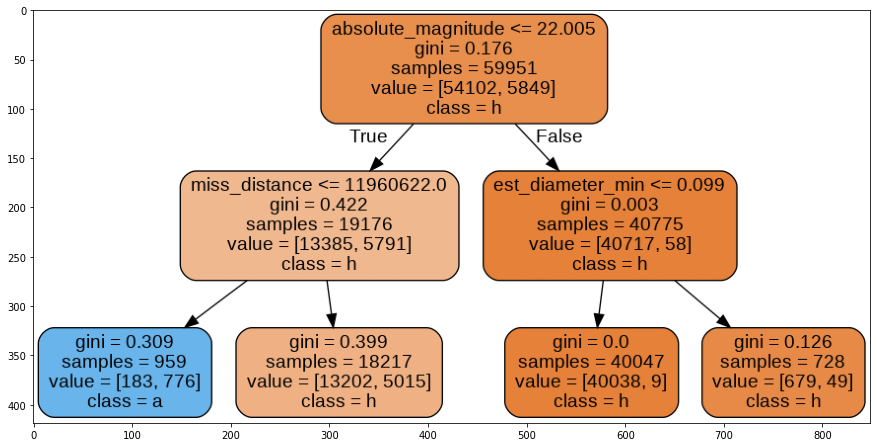

In [167]:
export_graphviz(
    dtree, # 학습한 모형
    out_file = './nasa_tree.dot', # .dot 파일 저장 위치
    feature_names = X.columns, # 사용한 변수 이름
    class_names = 'hazardous', # 예측할 타겟 클래스 이름
    rounded=True, # 사각형 끝을 둥글게
    filled=True # 사각형 안 색깔 채우기
)
# 예측한 모형 png로 바꿔서, 시각화 하기
check_call(['dot','-Tpng','nasa_tree.dot','-o','OutputFile.png'])
img = mpimg.imread('./OutputFile.png')
plt.figure(figsize = (15,10))
plt.imshow(img)


In [168]:
impt=(dtree.feature_importances_)
impt.sort()

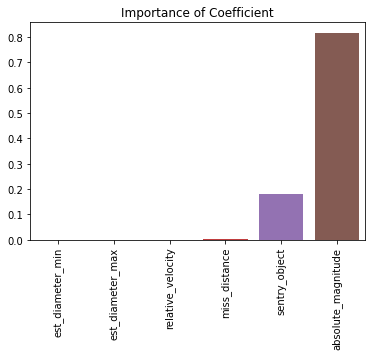

In [169]:
plt.title("Importance of Coefficient")
sns.barplot(x=X.columns, y=impt)
plt.xticks(rotation = 90)
plt.show()

결론 : harzardous에 가장 큰 영향을 미치는 변수는 절대등급(絶對等級, 영어: Absolute magnitude), 천체의 광도를 등급으로 나타낸 로그함수 이고 두번째는 충돌모니터링 시스템 내의 존재 여부이다.